In [1]:
# write a function to calculate specificity and sensitivity


In [6]:
# answer

# look up definitions
# sensitivity = TP / (TP + FN)
# specificity = TN / (TN + FP)

# make example data
import numpy as np
preds =  np.array([1,1,1,1,1,1,1,0,0,0,0,0,0,0,0])
actual = np.array([1,0,0,1,1,1,1,0,0,1,1,1,0,0,0])

In [13]:
# write a function
def specif_and_sentiv(actual, preds, calc = "specificity"):
    '''
    Calculate specificity or sensitivity
    # sensitivity = TP / (TP + FN)
    # specificity = TN / (TN + FP)
    
    
    Params:
    actual (1D array): actual values (0's or 1's)
    predicted (1D array): predicted values
    calc (string): either "sensitivity" or "specificity"
    
    Returns: 
    specificity or sensitivity (number between 0 and 1)
    '''
    
    TP = np.sum((actual == 1) & (preds == 1))
    TN = np.sum((actual == 0) & (preds == 0))
    FP = np.sum((actual == 0) & (preds == 1))
    FN = np.sum((actual == 1) & (preds == 0))
    
    if calc == "specificity":
        returnVal = TN / (TN + FP)
    elif calc == "sensitivity":
        returnVal = TP / (TP + FN)
    else:
        returnVal = "NA"
    return(returnVal)
    

In [18]:
# check
print(specif_and_sentiv(preds, actual, calc = "sensitivity"))
print(specif_and_sentiv(preds, actual, calc = "specificity"))

0.7142857142857143
0.625


In [71]:
# Write a function to calculate a percentile from a 1D array

# define percentile -- proportion at which x is below this point

# make eample data
dset = np.random.randn(107)
dset = np.linspace(1, 100, num = 101, endpoint=True)

In [87]:
# prototype 



def percentile(prop, dset):
    '''
    Calculate the percentile from a dataset
    
    Parameters:
    prop (float): proportion between 0 and 1
    dset (1D array): input data
    
    Returns: 
    percentile (float)
    
    '''

    # sort data
    dset = np.sort(dset)

    # find index wher x prop is less
    dta_index = prop * len(dset)
    dta_index

    if dta_index - np.ceil(dta_index) == 0:
        percentile = np.mean([dset[int(dta_index - 1)], dset[int(dta_index)]])
    else: 
        percentile = dset[int(np.ceil(dta_index))]

    return(percentile)

In [98]:
dset = np.random.randn(107000)

percentile(0.975, dset)

1.9552798962168818

In [49]:
int(np.ceil(dta_index))

81

In [57]:
dset[int(dta_index)]

51.0

In [58]:
np.median(dset)

50.5

In [100]:
1- (1/3)**3

0.962962962962963

In [94]:
### SVM practice
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [106]:
X,y = make_blobs(100, n_features = 2, centers = 2)

array([1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0])

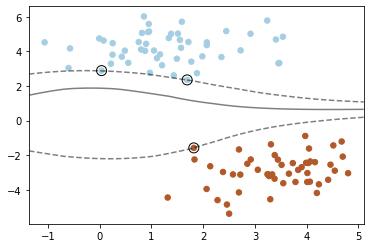

In [111]:
clf = svm.SVC(kernel='poly', C=100, gamma = 1)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2)
ytest

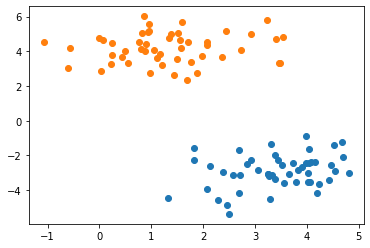

In [112]:
plt.plot(X[y ==1,0], X[y==1,1], 'o')
plt.plot(X[y ==0,0], X[y==0,1], 'o')

In [113]:
classifier = SVC(C = 0.1, gamma = 'scale')

In [114]:
classifier.fit(Xtrain, ytrain)
preds = classifier.predict(Xtest)

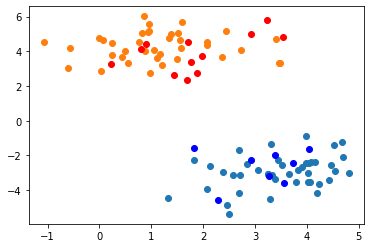

In [115]:
plt.plot(Xtrain[ytrain ==1,0], Xtrain[ytrain==1,1], 'C0o')
plt.plot(Xtrain[ytrain ==0,0], Xtrain[ytrain==0,1], 'C1o')
plt.plot(Xtest[ytest ==1,0], Xtest[ytest==1,1], 'bo')
plt.plot(Xtest[ytest ==0,0], Xtest[ytest==0,1], 'ro')

In [117]:
# linear discriminant analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [120]:
X,y = make_blobs(100, n_features = 2, centers = 3)
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2)

clf = LDA()
clf.fit(Xtrain, ytrain)  

preds = clf.predict(Xtest)

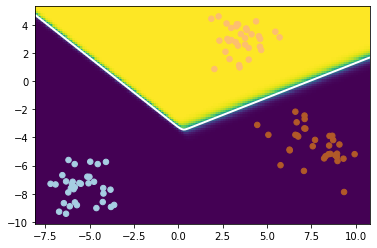

In [125]:
from matplotlib import colors
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                     np.linspace(y_min, y_max, ny))
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap='viridis',
               norm=colors.Normalize(0., 1.), zorder=0)
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

# xy = np.vstack([XX.ravel(), YY.ravel()]).T
# Z = clf.decision_function(xy).reshape(XX.shape)

# # plot decision boundary and margins
# ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
#            linestyles=['--', '-', '--'])
plt.show()

In [127]:
import numpy as np
import matplotlib.pyplot as plt

In [128]:
# bootstrap CI for the median
dta =  np.random.randn(50)+ 56
np.median(dta)

56.06641633925066

In [148]:
def bootFunction(dta):
    newDta = np.random.choice(dta, size = len(dta), replace = True)
    return(np.median(newDta))



bootSamples = [bootFunction(dta) for ii in range(100000)]

In [149]:
np.mean(bootSamples)

56.11049931373972

In [150]:
np.quantile(bootSamples, [0.025, 0.975])

array([55.63265979, 56.67267687])

In [168]:
### Bootstrap CI for proportion

dta = np.random.choice(np.array([0,1]), size = 100, replace = True, p = [0.3, 0.7])

In [169]:
np.mean(dta)

0.68

In [170]:
def bootFunction_prop(dta):
    resamp = np.random.choice(dta, size = len(dta), replace = True)
    return(np.mean(resamp))

In [184]:
bootFunction_prop(dta)

0.67

In [186]:
bootSamps = [bootFunction_prop(dta) for ii in range(1000000)]

In [187]:
np.mean(bootSamps)

0.6799711900000003

In [188]:
np.quantile(bootSamps, [0.025, 0.975])

array([0.59, 0.77])